In [1]:
import numpy
import tensorflow as tf
from prompt_toolkit.input import Input
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

2024-08-29 18:25:43.129108: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-29 18:25:43.135631: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-29 18:25:43.156055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-29 18:25:43.199401: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-29 18:25:43.211950: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-29 18:25:43.238934: I tensorflow/core/platform/cpu_feature_gu

# Parte 1: Introducción

### Ejercicio 1
Generar un tensor llamado **x** cuyo contenido sea el siguiente:
```
tensor([[[0, 2, 4, 6, 8],
		 [10, 12, 14, 16, 18],
		 [20, 22, 24, 26, 28]],
		[[30, 32, 34, 36, 38],
		 [40, 42, 44, 46, 48],
		 [50, 52, 54, 56, 58]]])
```

![Imgur](https://i.imgur.com/rfaKGUG.png)

In [3]:
x = tf.constant([[[0, 2, 4, 6, 8],
				  [10, 12, 14, 16, 18],
				  [20, 22, 24, 26, 28]],
				 [[30, 32, 34, 36, 38],
				  [40, 42, 44, 46, 48],
				  [50, 52, 54, 56, 58]]])
print(x)

tf.Tensor(
[[[ 0  2  4  6  8]
  [10 12 14 16 18]
  [20 22 24 26 28]]

 [[30 32 34 36 38]
  [40 42 44 46 48]
  [50 52 54 56 58]]], shape=(2, 3, 5), dtype=int32)


In [6]:
x[0][0][0]

<tf.Tensor: shape=(), dtype=int32, numpy=0>

### Ejercicio 2
Realizar los cambios necesarios en los siguientes tensores para que sea posible multiplicar cada columna del tensor "X" por el vector "y".

In [8]:
X = tf.ones((2, 4, 5, 3), dtype=tf.int32)
print("X:\n", X)
y = tf.constant([1, 2, 3, 4, 5])
print("\ny:\n", y)

y_reshaped = tf.reshape(y, (1, 1, 5, 1))
print("\ny_reshaped:\n", y_reshaped)

result = tf.multiply(X, y_reshaped)
print("\nResult:\n", result)

X:
 tf.Tensor(
[[[[1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]]]


 [[[1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]
   [1 1 1]]]], shape=(2, 4, 5, 3), dtype=int32)

y:
 tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)

y_reshaped:
 tf.Tensor(
[[[[1]
   [2]
   [3]
   [4]
   [5]]]], shape=(1, 1, 5, 1), dtype=int32)

Result:
 tf.Tensor(
[[[[1 1 1]
   [2 2 2]
   [3 3 3]
   [4 4 4]
   [5 5 5]]

  [[1 1 1]
   [2 2 2]
   [3 3 3]
   [4 4 4]
   [5 5 5]]

  [[1 1 1]
   [2 2 2]
   [3 3 3]
   [4 4 4]
   [5 5 5]]

  [[1 1 1]
   [2 2 2]
   [3 3 3]
   [4 4 4]
   [5 5 5]]]


 [[[1 1 1]
   [2 2 2]
   [3 3 3]
   [4 4 4]
   [5 5 5]]

  [[1 1 1]
   [2 2 2]
   [3 3 3]
 

### Ejercicio 3
Sobre Tensores, implemente las operaciones Suma, Producto Tensorial y Contraccion Tensorial. Para ello agregue las operaciones tensoriales que sean pertinentes

In [9]:
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[5, 6], [7, 8]])

# suma
sum_result = tf.add(a, b)

# producto tensorial (outer product)
outer_product = tf.tensordot(a, b, axes=0)

# contracción tensorial (sumar sobre índices)
contraction = tf.tensordot(a, b, axes=1)

print("Suma:\n", sum_result)
print("Producto Tensorial:\n", outer_product)
print("Contracción Tensorial:\n", contraction)


Suma:
 tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)
Producto Tensorial:
 tf.Tensor(
[[[[ 5  6]
   [ 7  8]]

  [[10 12]
   [14 16]]]


 [[[15 18]
   [21 24]]

  [[20 24]
   [28 32]]]], shape=(2, 2, 2, 2), dtype=int32)
Contracción Tensorial:
 tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


### Ejercicio 4
Descargar y estudiar el dataset de IMDB de Keras (num_words = 10000)
Separar el dataset en conjuntos de train y test

In [10]:
from tensorflow.keras.datasets import imdb

# descargar el dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train data shape: (25000,)
Test data shape: (25000,)


# Ejercicio 5
Dentro del conjunto de Test extraer el primer review positivo y el primer negativo. Hacer la codificacion back-to-text de cada uno de ellos

In [11]:
word_index = imdb.get_word_index()  # Retrieves a dict mapping words to their index in the IMDB dataset.
reverse_word_index = {value: key for key, value in word_index.items()}

# Reverse the word index to obtain a dict mapping indices to words
# Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for "padding", "start of sequence", and "unknown".
def decode_review(text):
	return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

# encontrar el primer review positivo y negativo
positive_review = next(review for review, label in zip(test_data, test_labels) if label == 1)
negative_review = next(review for review, label in zip(test_data, test_labels) if label == 0)

print("Positive Review:\n", decode_review(positive_review))
print("\nNegative Review:\n", decode_review(negative_review))

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Positive Review:
 ? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the ? moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexua

### Ejercicio 6
Sin hacer uso de las librerias de Keras, crear una red neuronal feed-forward fully_connected con la siguiente arquitectura: capa de entrada - 16 -16 - capa de salida.
(Programar todas las funciones necesarias)


In [12]:
import numpy as np

def relu(x):
	return np.maximum(0, x)

def softmax(x):
	e_x = np.exp(x - np.max(x))
	return e_x / e_x.sum(axis=0)

# crear la red neuronal
input_size = 10000
hidden_size = 16
output_size = 1

# inicializar pesos
W1 = np.random.randn(hidden_size, input_size)
W2 = np.random.randn(hidden_size, hidden_size)
W3 = np.random.randn(output_size, hidden_size)

def forward(x):
	h1 = relu(np.dot(W1, x))
	h2 = relu(np.dot(W2, h1))
	output = softmax(np.dot(W3, h2))
	return output

x_example = np.random.randn(input_size)
output_example = forward(x_example)
print(output_example)

[1.]


### Ejercicio 7
Tomar un lote random de 100 reviews en el conjunto de train y hacer forward por su red neuronal estimando el error para ese lote. Definir la funcion de error pertinente.

In [15]:
indices = np.random.choice(len(train_data), 100, replace=False)
# batch = np.array([train_data[i] for i in indices])

# definir la longitud máxima (500 palabras por review)
maxlen = 500
vocab_size = 10000
# rellenar o truncar cada review para que tenga la misma longitud
batch = np.zeros((100, vocab_size))

for i, idx in enumerate(indices):
	review = train_data[idx]
	for word_idx in review:
		if word_idx < vocab_size:
			batch[i, word_idx] = 1

outputs = np.array([forward(x) for x in batch])
print(outputs)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


### Ejercicio 8
Usando Keras defina la misma red neuronal anterior

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
	Input(shape=(10000,)),
	Dense(16, activation='relu'),
	Dense(16, activation='relu'),
	Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

### Ejercicio 9
Entrene el modelo definido usando un batchs de 512 elementos y 20 epoch. Recuerden generar los conjuntos de validacion y train.

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

vocab_size = 10000

# Codificar cada review en un vector de tamaño vocab_size
def vectorize_sequences(sequences, dimension=vocab_size):
	results = np.zeros((len(sequences), dimension))
	for i, sequence in enumerate(sequences):
		results[i, sequence] = 1
	return results

# Vectorizar el train_data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Convertir las etiquetas a arrays de NumPy
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")

# Entrenamiento
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.2)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7063 - loss: 0.5890 - val_accuracy: 0.8776 - val_loss: 0.3336
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9084 - loss: 0.2654 - val_accuracy: 0.8892 - val_loss: 0.2779
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9395 - loss: 0.1831 - val_accuracy: 0.8902 - val_loss: 0.2856
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9573 - loss: 0.1383 - val_accuracy: 0.8878 - val_loss: 0.2936
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9677 - loss: 0.1118 - val_accuracy: 0.8832 - val_loss: 0.3247
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9723 - loss: 0.0937 - val_accuracy: 0.8808 - val_loss: 0.3465
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9785 - loss: 0.0773 - val_accuracy: 0.8832 - val_loss: 0.3789
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9876 - loss: 0.0588 - val_accuracy: 0.8780 - v

### Ejercicio 10
Plotear las curvas de **Training vs Validation Loss** con la loss por cada epochs
Plotear las curvas de **Training vs Validation Accuracy** con el accuracy por cada epochs

Haga un resumen con las conclusiones observadas en ambas graficas

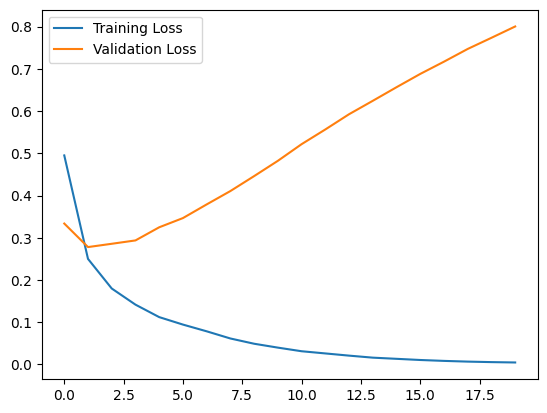

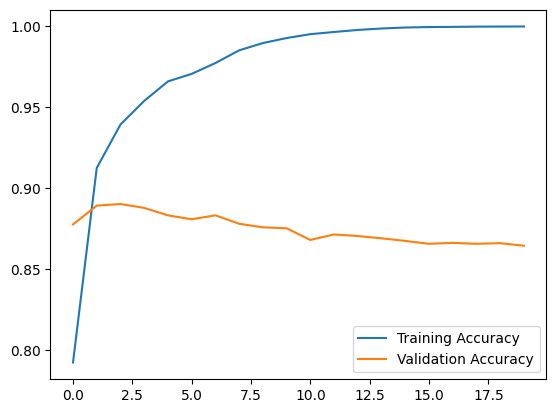

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()